In [61]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
minimal_prompt_log_file = open("logs/loopy_2023_08_27_02_50_01_processed/final_output_no_prune.json")
minimal_prompt_log = json.load(minimal_prompt_log_file)
minimal_prompt_log_file.close()

without_nudges_log_file = open("logs/loopy_2023_08_25_13_52_59_processed/final_output_no_prune.json")
without_nudges_log = json.load(without_nudges_log_file)
without_nudges_log_file.close()

with_nudges_log_file = open("logs/loopy_2023_08_25_13_54_09_processed/final_output_no_prune.json")
with_nudges_log = json.load(with_nudges_log_file)
with_nudges_log_file.close()

In [4]:
m_p = {i:0 for i in range(1, 15)}
wo_n = {i:0 for i in range(1, 15)}
w_n = {i:0 for i in range(1, 15)}

for i in minimal_prompt_log:
    m_p[i["k"]] = i["pass_at_k"]

for i in without_nudges_log:
    wo_n[i["k"]] = i["pass_at_k"]

for i in with_nudges_log:
    w_n[i["k"]] = i["pass_at_k"]

In [59]:
m_p.values()

dict_values([121.19999999999996, 138.40000000000003, 145.9, 155.20000000000005, 158.00000000000003, 162.5, 165.90000000000006, 169.8, 169.80000000000007, 173.49999999999997, 176.10000000000002, 178.4, 179.7, 181.60000000000005, 183.0])

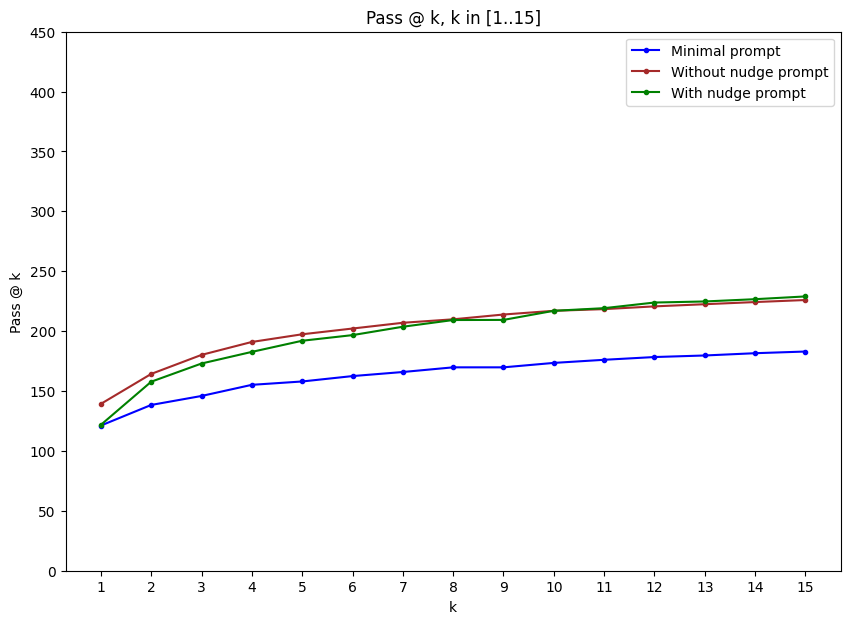

In [54]:
_ = plt.figure(figsize=(10, 7))
plt.plot(m_p.keys(), m_p.values(), '.-', color='blue', label='Minimal prompt')
plt.plot(wo_n.keys(), wo_n.values(), '.-', color='brown', label='Without nudge prompt')
plt.plot(w_n.keys(), w_n.values(), '.-', color='green', label='With nudge prompt')
plt.xticks(range(1, 16))
plt.ylim(0, 450)
plt.xlabel('k')
plt.ylabel('Pass @ k')
plt.legend()
plt.title('Pass @ k, k in [1..15]')
plt.savefig('pass_at_k_all.png')
plt.show()

In [38]:
x_m_p = np.array(list(m_p.keys()), dtype=np.float64)
y_m_p = np.array(list(m_p.values()), dtype=np.float64)
sl_m_p = np.diff(y_m_p) / np.diff(x_m_p)

x_w_n = np.array(list(w_n.keys()), dtype=np.float64)
y_w_n = np.array(list(w_n.values()), dtype=np.float64)
sl_w_n = np.diff(y_w_n) / np.diff(x_w_n)

x_wo_n = np.array(list(wo_n.keys()), dtype=np.float64)
y_wo_n = np.array(list(wo_n.values()), dtype=np.float64)
sl_wo_n = np.diff(y_wo_n) / np.diff(x_wo_n)

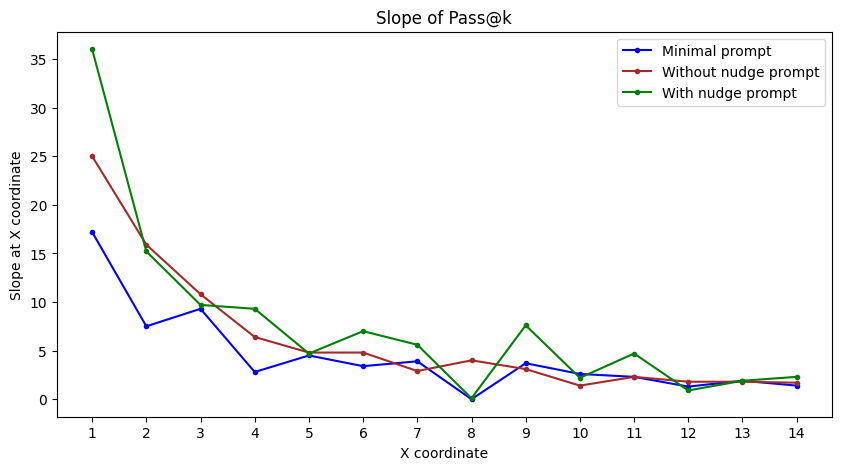

In [60]:
_ = plt.figure(figsize=(10, 5))
x = range(1, 15)
plt.plot(x, sl_m_p, '.-', label='Minimal prompt', color='blue')
plt.plot(x, sl_wo_n, '.-', label='Without nudge prompt', color='brown')
plt.plot(x, sl_w_n, '.-', label='With nudge prompt', color='green')
plt.xticks(x)
plt.legend()
plt.xlabel('X coordinate')
plt.ylabel('Slope at X coordinate')
plt.title('Slope of Pass@k')
plt.show()

In [97]:
m_p_combine_prune = {  }
w_n_p_combine_prune = {  }
wo_n_p_combine_prune = {  }

for i in range(1, 16):
    log_file_path = f"logs/loopy_2023_08_27_02_50_01_processed/pass_at_{i}_combine_and_prune.json"
    if os.path.exists(log_file_path):
        with open(log_file_path, "r", encoding="utf-8") as f:
            log = json.load(f)
            m_p_combine_prune[i] = log["pass_at_k"]

    log_file_path = f"logs/loopy_2023_08_25_13_54_09_processed/pass_at_{i}_combine_and_prune.json"
    if os.path.exists(log_file_path):
        with open(log_file_path, "r", encoding="utf-8") as f:
            log = json.load(f)
            w_n_p_combine_prune[i] = log["pass_at_k"]

    log_file_path = f"logs/loopy_2023_08_25_13_52_59_processed/pass_at_{i}_combine_and_prune.json"
    if os.path.exists(log_file_path):
        with open(log_file_path, "r", encoding="utf-8") as f:
            log = json.load(f)
            wo_n_p_combine_prune[i] = log["pass_at_k"]

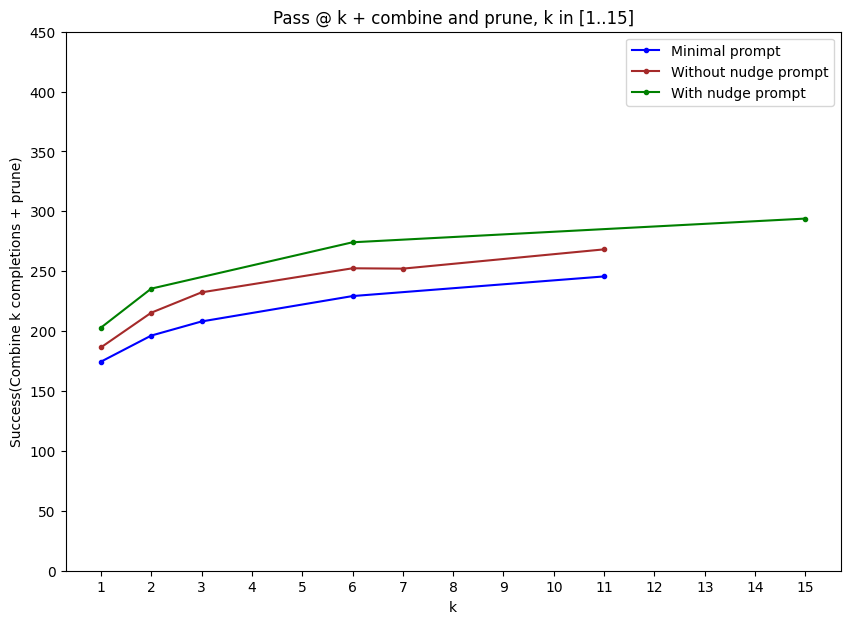

In [98]:
x = range(1, 16)
_ = plt.figure(figsize=(10, 7))
plt.plot(m_p_combine_prune.keys(), m_p_combine_prune.values(), '.-', color='blue', label='Minimal prompt')
plt.plot(wo_n_p_combine_prune.keys(), wo_n_p_combine_prune.values(), '.-', color='brown', label='Without nudge prompt')
plt.plot(w_n_p_combine_prune.keys(), w_n_p_combine_prune.values(), '.-', color='green', label='With nudge prompt')
plt.xticks(range(1, 16))
plt.ylim(0, 450)
plt.xlabel('k')
plt.ylabel('Success(Combine k completions + prune)')
plt.legend()
plt.title('Pass @ k + combine and prune, k in [1..15]')
plt.savefig('pass_at_k_prune_all.png')
plt.show()

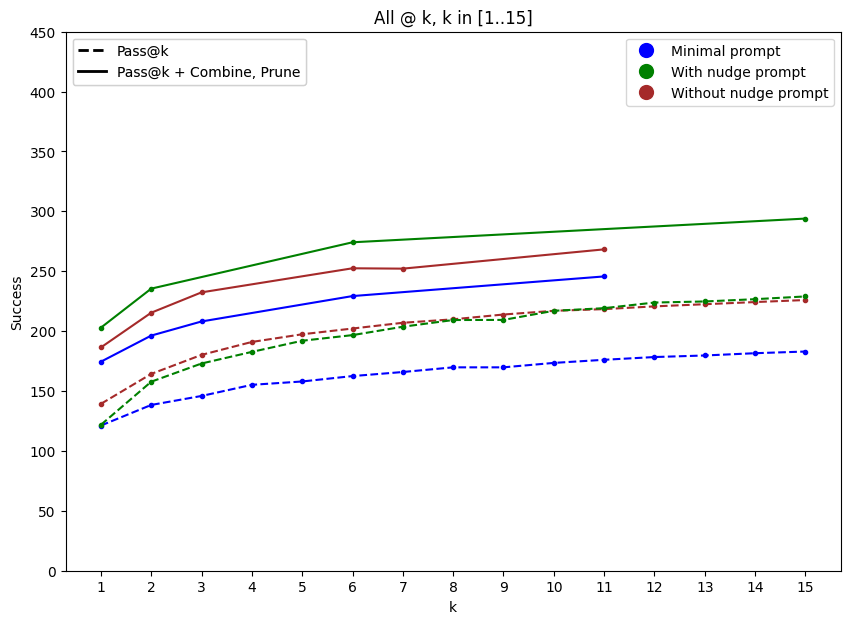

In [101]:
from matplotlib.lines import Line2D

legend_elements1 = [Line2D([0], [0], marker='o', color='w', label='Minimal prompt', markerfacecolor='blue', markersize=12),
                   Line2D([0], [0], marker='o', color='w', label='With nudge prompt', markerfacecolor='green', markersize=12),
                   Line2D([0], [0], marker='o', color='w', label='Without nudge prompt', markerfacecolor='brown', markersize=12)]

legend_elements2 = [Line2D([0], [0], color='black', lw=2, label='Pass@k', linestyle='--'),
                   Line2D([0], [0], color='black', lw=2, label='Pass@k + Combine, Prune', linestyle='-')]
x = range(1, 16)
_ = plt.figure(figsize=(10, 7))
plt.plot(m_p_combine_prune.keys(), m_p_combine_prune.values(), '.-', color='blue', label='Minimal prompt')
plt.plot(wo_n_p_combine_prune.keys(), wo_n_p_combine_prune.values(), '.-', color='brown', label='Without nudge prompt')
plt.plot(w_n_p_combine_prune.keys(), w_n_p_combine_prune.values(), '.-', color='green', label='With nudge prompt')
plt.plot(m_p.keys(), m_p.values(), '.--', color='blue', label='Minimal prompt')
plt.plot(wo_n.keys(), wo_n.values(), '.--', color='brown', label='Without nudge prompt')
plt.plot(w_n.keys(), w_n.values(), '.--', color='green', label='With nudge prompt')
plt.xticks(range(1, 16))
plt.ylim(0, 450)
plt.xlabel('k')
plt.ylabel('Success')
legend1 = plt.legend(handles=legend_elements1, loc='upper right')
plt.gca().add_artist(legend1)
legend2 = plt.legend(handles=legend_elements2, loc='upper left')
plt.gca().add_artist(legend2)
plt.title('All @ k, k in [1..15]')
plt.savefig('pass_at_k_prune_no_prune_combined_all.png')
plt.show()